In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
import chart_studio.plotly as py
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
#For LR
import statsmodels.api as sm
#For LR That looks like R
import statsmodels.formula.api as smf
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
print("Packages LOADED")

Packages LOADED


In [2]:
import os
print(os.getcwd())
os.chdir('F:\\DataScience\\Datasets\\')
print(os.getcwd())
data = pd.read_csv('diabetes2.csv')
data.info()

C:\Users\Sunny\Desktop\jupyter notebook
F:\DataScience\Datasets
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


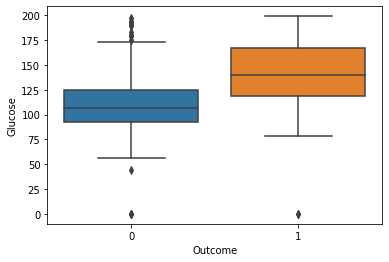

In [3]:
get_ipython().magic('matplotlib inline')
sns.boxplot(data.Outcome,data.Glucose)
# sns.boxplot(data.Outcome,data.BloodPressure)
# sns.boxplot(data.Outcome,data.SkinThickness)
# sns.boxplot(data.Outcome,data.Insulin)
# sns.boxplot(data.Outcome,data.BMI)
# sns.boxplot(data.Outcome,data.DiabetesPedigreeFunction)
# sns.boxplot(data.Outcome,data.Age)

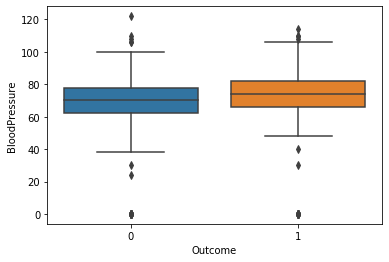

In [4]:
sns.boxplot(data.Outcome,data.BloodPressure)

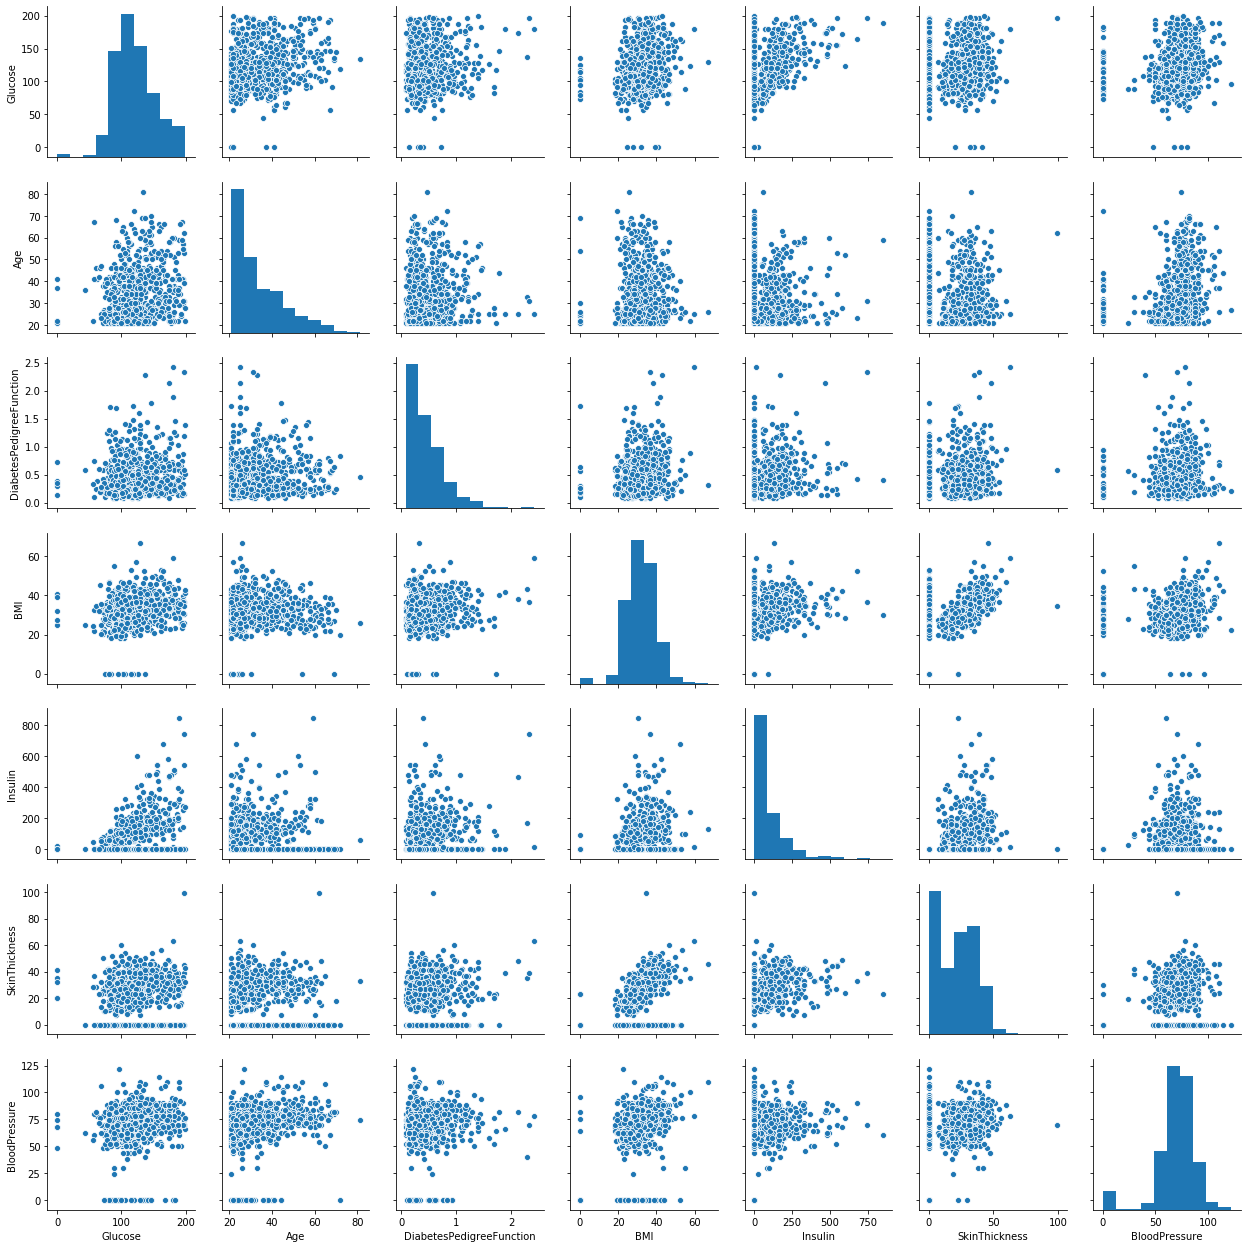

In [5]:
data_n=data[['Glucose','Age','DiabetesPedigreeFunction','BMI','Insulin','SkinThickness','BloodPressure']]
sns.pairplot(data_n)

In [6]:
corr = data.corr()
print(corr)
# print('-'*30)
# mask = np.zeros_like(corr, dtype=np.bool)
# print(mask)
# print('-'*30)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

[[False False False False False False False False False]
 [False False False False False False False False False]
 [False False False False False False False False False]
 [False False False False False False False False False]
 [False False False False False False False False False]
 [False False False False False False False False False]
 [False False False False False False False False False]
 [False False False False False False False False False]
 [False False False False False False False False False]]
------------------------------


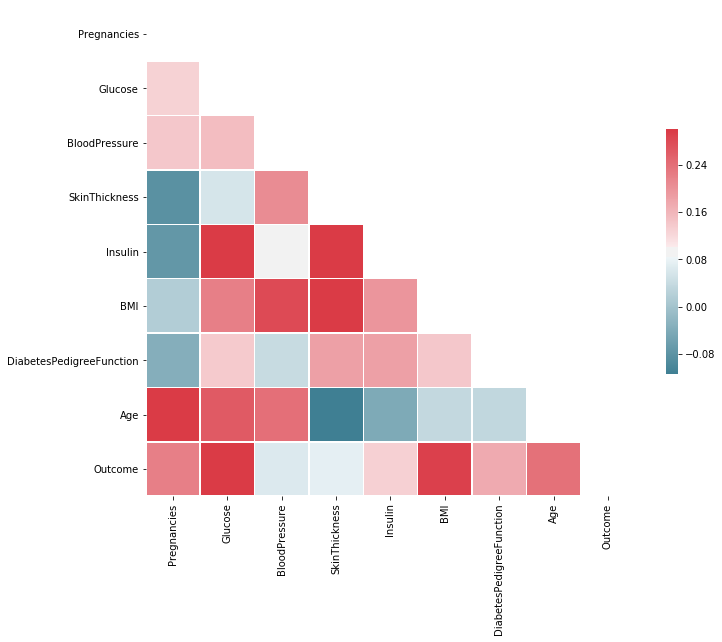

In [7]:
mask = np.zeros_like(corr, dtype=np.bool)
print(mask)
print('-'*30)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
square=True,
linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

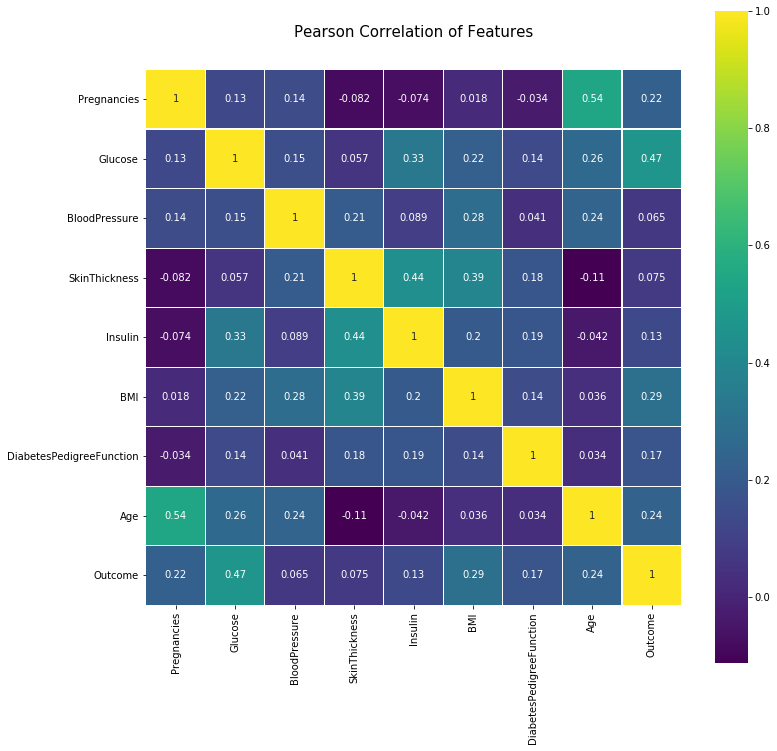

In [8]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [9]:
data.describe()
truediabetes= data.loc[data['Outcome']==1]
truediabetes.head()
len(truediabetes)
truediabetes.mean()
falsediabetes= data.loc[data['Outcome']==0]
len(falsediabetes)
falsediabetes.mean()

Pregnancies                   3.298000
Glucose                     109.980000
BloodPressure                68.184000
SkinThickness                19.664000
Insulin                      68.792000
BMI                          30.304200
DiabetesPedigreeFunction      0.429734
Age                          31.190000
Outcome                       0.000000
dtype: float64

F:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
F:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


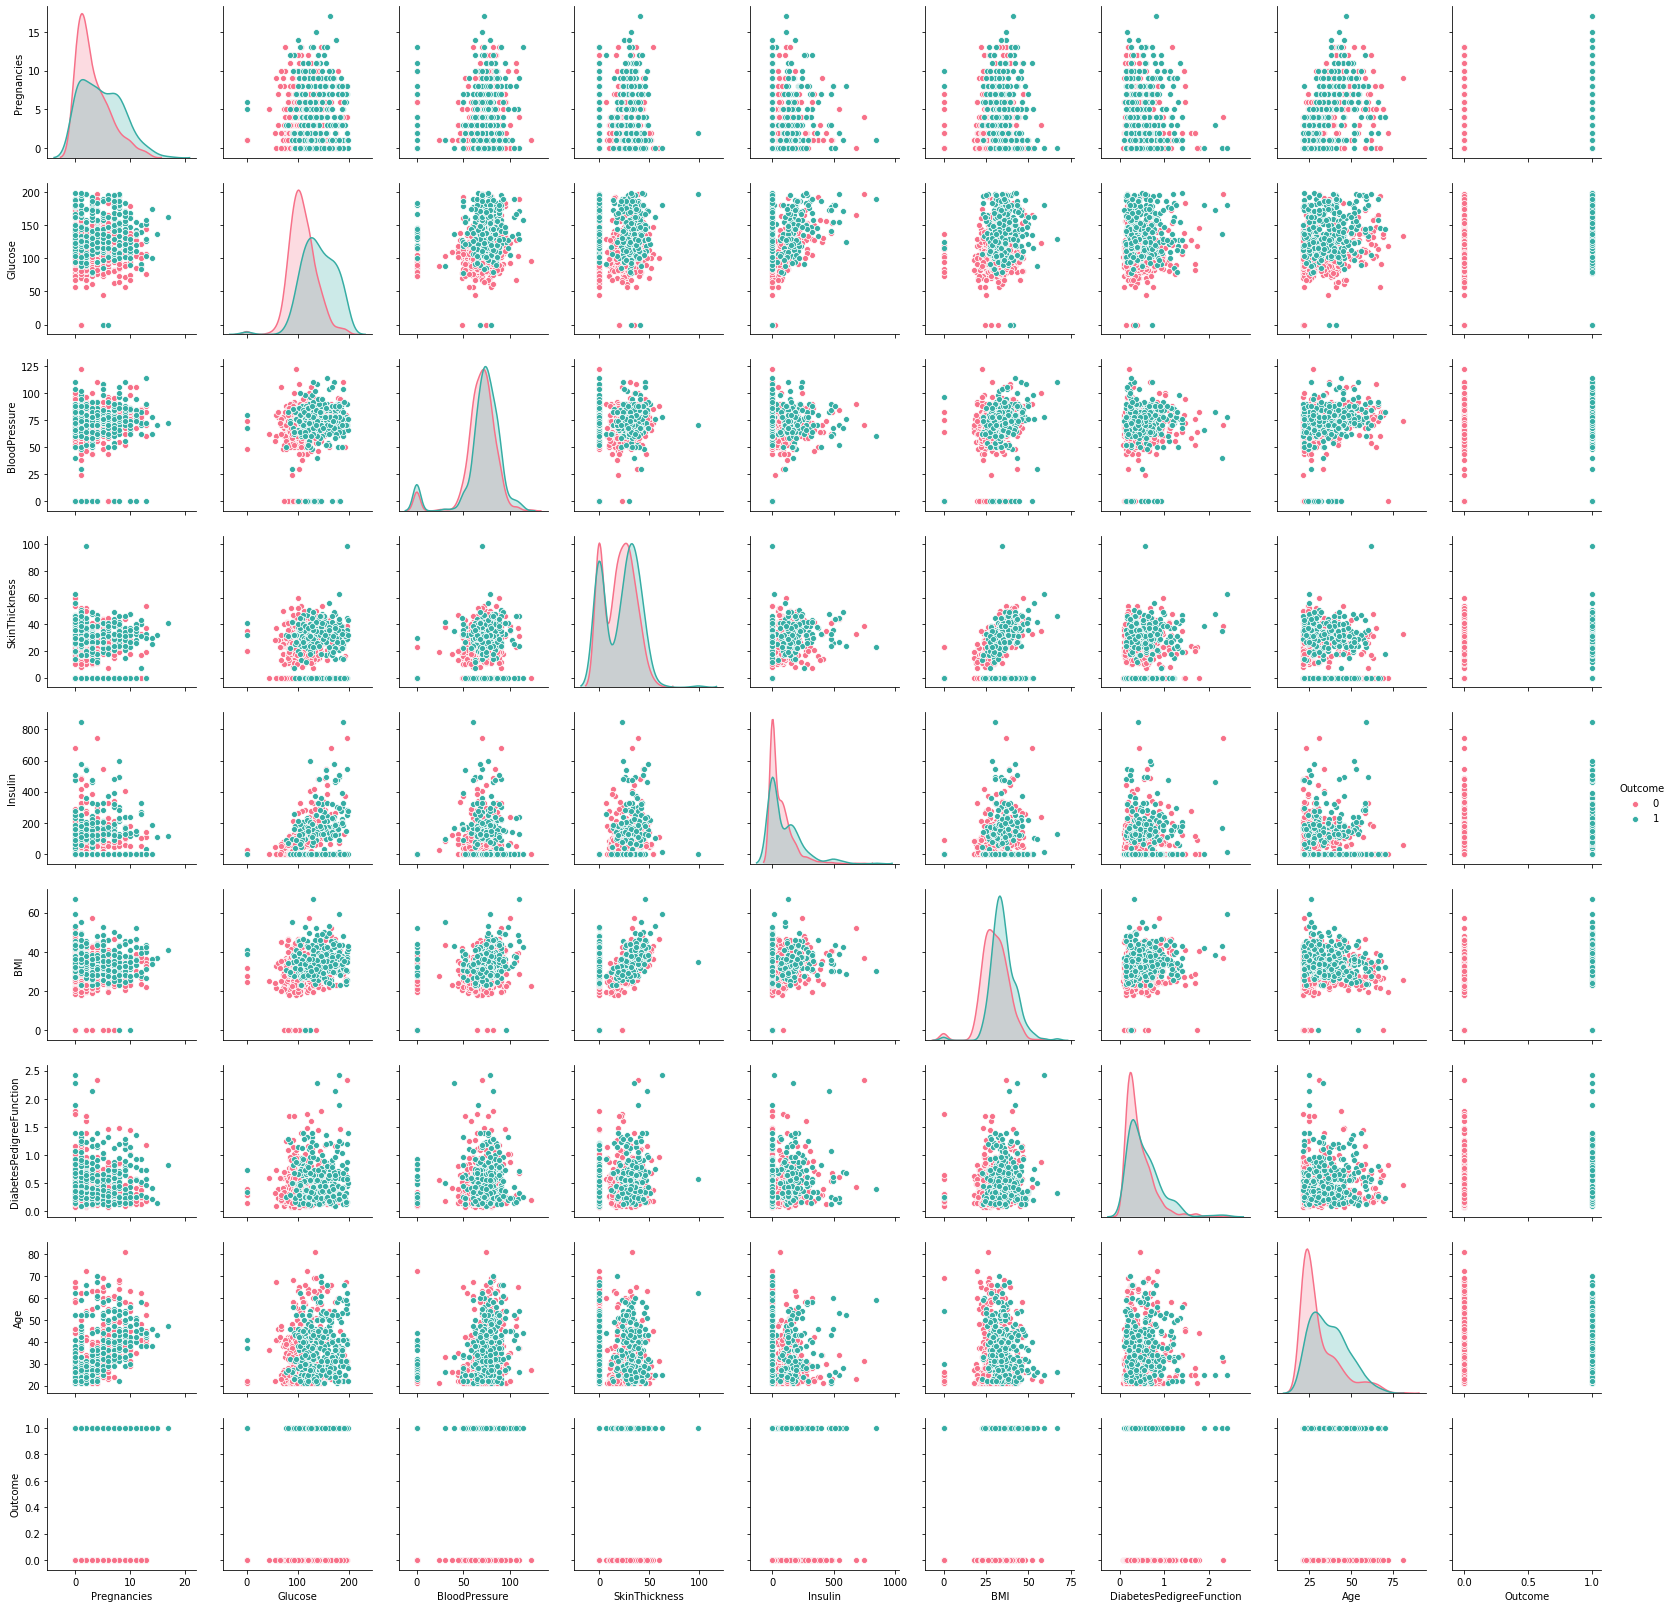

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
sb.pairplot(data.dropna(), hue='Outcome', palette="husl")

In [11]:
# import numpy as np
# import seaborn as sns
# cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age', 'Outcome']
# cm = np.corrcoef(data[cols].values.T)
# sns.set(font_scale=1.5)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,xticklabels=cols)
plt.show()


NameError: name 'cm' is not defined

In [ ]:
data.loc[data['Outcome'] == 0, 'Glucose'].hist()
data.loc[data['Outcome']==1, 'Glucose'].hist()
data.loc[data['Outcome']==0, 'Insulin'].hist()
data.loc[data['Outcome']==1, 'Insulin'].hist()
data.loc[data['Outcome']==1, 'BMI'].hist()
data.loc[data['Outcome']==0, 'BMI'].hist()
data.loc[data['Outcome']==1, 'Age'].hist()
data.loc[data['Outcome']==0, 'Age'].hist()

In [ ]:
plt.figure(figsize=(20, 20))
for column_index, column in enumerate(falsediabetes.columns):
    if column == 'Outcome':
        continue
plt.subplot(4, 4, column_index + 1)
sb.violinplot(x='Outcome', y=column, data=falsediabetes)
# plt.figure(figsize=(20, 20))
# for column_index, column in enumerate(truediabetes.columns):
# if column == 'Outcome':
# continue
# plt.subplot(4, 4, column_index + 1)
# sb.violinplot(x='Outcome', y=column, data=truediabetes)

In [ ]:
plt.figure(figsize=(20, 20))
for column_index, column in enumerate(truediabetes.columns):
    if column == 'Outcome':
        continue
plt.subplot(4, 4, column_index + 1)
sb.violinplot(x='Outcome', y=column, data=truediabetes)

In [ ]:
print(" == class distribution ==")
print(data.groupby('Outcome').size())


In [ ]:
print(" == Univariate Plots: box and whisker plots. determine outliers = ")
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

In [ ]:
print(" == Univariate Plots: histograms. determine if the distribution is normal-like == ")
data.hist()
plt.show()

In [ ]:
import pandas
from pandas.plotting import scatter_matrix
print("== Multivariate Plots: scatter plot matrix. spot structured relationships between input variables ==")
scatter_matrix(data)
plt.show()

In [ ]:
import sklearn
array = data.values
array
type(array)

In [ ]:
X = array[:,0:8] # ivs for train
X


In [ ]:
y = array[:,8] # dv
y

In [ ]:
test_size = 0.33


In [ ]:
from sklearn.model_selection import train_test_split
#pip install -U scikit-learn
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_size)
print('Partitioning Done!')

In [ ]:
regr = skl_lm.LogisticRegression()
regr.fit(X_train, y_train)
pred = regr.predict(X_test)
pred


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
regr.score(X_test,y_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=regr.classes_,
columns=regr.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))
# regr.score(X_test,y_test)
